In [15]:
import nltk
import os

In [16]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = os.path.expanduser('~/cltk_data/greek/text/greek_text_first1kgreek_plaintext/')

In [17]:
# to get all files
first1kgr_plaintext_folder = PlaintextCorpusReader(corpus_root, ".*")

In [18]:
# Lake's Apostolic Fathers filenames
apos_fat_names = ["0646.tlg004", "1216.tlg001", "tlg1271.tlg002", "1311.tlg001", "1443.tlg004", "1443.tlg005", "1443.tlg006", "1443.tlg007", "1443.tlg008", "1443.tlg009", "1443.tlg010", "1484.tlg001", "1622.tlg001"]

In [19]:
# sellecting the greek texts only (works)
apos_fathers = first1kgr_plaintext_folder.raw(fileids=[f for f in first1kgr_plaintext_folder.fileids() if "grc" in f])




In [36]:
# CLEANING
# IMPORTING THE TOOL
from cltk.corpus.utils.formatter import tlg_plaintext_cleanup

corpus_cleaned = tlg_plaintext_cleanup(first1kgr, rm_punctuation=True, rm_periods=False)

In [38]:
# LEMMATIZATION
# does not work so good as I would like
from cltk.stem.lemma import LemmaReplacer
lemmatizer = LemmaReplacer('greek')
corpus_cleaned = corpus_cleaned.lower()
corpus_lemmatized = lemmatizer.lemmatize(corpus_cleaned, return_string=True)

In [46]:
# STROPWORDS FILTERING
from nltk.tokenize.punkt import PunktLanguageVars
from cltk.stop.greek.stops import STOPS_LIST
STOPS_LIST = STOPS_LIST + ['.','|',';','τὰς','δ','α','—','ἀλλ','. . .','β',')']


p = PunktLanguageVars()
corpus_tokens = p.word_tokenize(corpus_lemmatized.lower())
corpus_tok = [w for w in corpus_tokens if not w in STOPS_LIST]
text_str = " ".join(corpus_tok)

In [48]:
# LEMMATIZATION
# does not work so good as I would like
from cltk.stem.lemma import LemmaReplacer
lemmatizer = LemmaReplacer('greek')
corpus_lemmatized = lemmatizer.lemmatize(corpus_tok, return_string=True)

In [49]:
# STROPWORDS FILTERING
from nltk.tokenize.punkt import PunktLanguageVars
from cltk.stop.greek.stops import STOPS_LIST
STOPS_LIST = STOPS_LIST + ['.','|',';','τὰς','δ','α','—','ἀλλ','. . .','β','ἀπ']


p = PunktLanguageVars()
corpus_tokens = p.word_tokenize(corpus_lemmatized.lower())
corpus_tok = [w for w in corpus_tokens if not w in STOPS_LIST]
text_str = " ".join(corpus_tok)

In [67]:
# SIMPLE REPLACEMENT
corpus_tok = [w.replace('θεὸν','θεός') for w in corpus_tok]

In [80]:
# COMPLEX REPLACEMENT (from https://gomputor.wordpress.com/2008/09/27/search-replace-multiple-words-or-characters-with-python/)
def replace_all(text, dic):
    for i, j in dic.items():
        text = [w.replace(i, j) for w in text]
    return text


In [90]:
replace_dic = {'θεὸν':'θεός','θεὸς':'θεός','ἐστὶν':'εἰμί','ἐστὶ':'εἰμί','εἰμί.':'εἰμί','λόγον':'λόγος'}

In [91]:
corpus_tok_rep = replace_all(corpus_tok_rep, replace_dic)

In [106]:
import nltk
corpus_fdist = nltk.FreqDist(corpus_tok_rep)
corpus_fdist.most_common(300)

[('εἰμί', 362125),
 ('οὐ', 196432),
 ('αὐτός', 169941),
 ('ἔχω', 82239),
 ('ἐγώ', 68754),
 ('οὖν', 66445),
 ('πᾶς', 42826),
 ('σύ', 39330),
 ('ἵημι', 30823),
 ('εἶπον', 30611),
 ('αὐτὸν', 30184),
 ('φημί', 29964),
 ('ποιέω', 28952),
 ('ὅλοξ', 27816),
 ('δέω1', 26311),
 ('οἷος', 26080),
 ('ὥσπερ', 25119),
 ('ἑαυτοῦ', 24705),
 ('ὅσος', 24432),
 ('πρότερος', 24223),
 ('οὔτε', 24172),
 ('τούτων', 24050),
 ('καθ', 23140),
 ('ι', 22909),
 ('ἀνά', 22908),
 ('αὐτὸ', 22684),
 ('τοιοῦτος', 21402),
 ('μᾶλλον', 20441),
 ('νῦν', 20283),
 ('πάντα', 19499),
 ('ἄνθρωπος', 19123),
 ('δι', 19020),
 ('ὁράω', 19015),
 ('λέγω1', 18984),
 ('οὐδὲν', 18784),
 ('αἴρω', 18677),
 ('ἐκεῖνος', 18438),
 ('εἶδος', 18330),
 ('πως', 18120),
 ('ἐπεὶ', 18036),
 ('ὅταν', 17978),
 ('μόνον', 17961),
 ('ὃ', 17789),
 ('γαῖα', 17722),
 ('θεάομαι', 17558),
 ('ἕτερος', 16740),
 ('γίγνομαι', 16622),
 ('πάλιν', 16459),
 ('κατ', 16384),
 ('κινέω', 16303),
 ('ἐράομαι', 16111),
 ('“', 16111),
 ('θεός', 15598),
 ('δοκέω', 15427),
 ('

In [117]:
# FOR SOME REASONS IT DOESN'T WORK WITH JESUS

words_of_interest = ['θεός','ἰησοῦς','χριστός','κύριος','υἱός','ἀγαθὸν']

for w in words_of_interest:
    print(w + ": ", corpus_tok_rep.count(w), end=", ")

θεός:  15598, ἰησοῦς:  0, χριστός:  5830, κύριος:  2810, υἱός:  4948, ἀγαθὸν:  4842, 

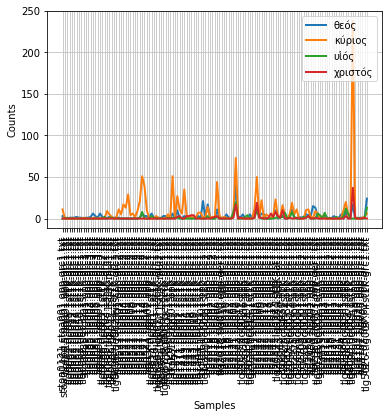

In [123]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid)
    for fileid in first1kgr_plaintext_folder.fileids()
    for w in first1kgr_plaintext_folder.words(fileid)
    for target in ['θεός','χριστός','κύριος','υἱός']
    if w.lower().startswith(target))
cfd.plot()

In [119]:
first1kgr_plaintext_folder.fileids()

['heb0001.heb010.1st1K-eng1.txt',
 'stoa0033a.tlg028.1st1K-grc1.txt',
 'stoa0033a.tlg043.1st1K-grc1.txt',
 'stoa0121.stoa001.opp-grc1.txt',
 'stoa0146d.stoa001.opp-grc1.txt',
 'stoa0146d.stoa001.opp-lat1.txt',
 'tlg0015.tlg001.opp-grc1.txt',
 'tlg0018.tlg001.opp-grc1.txt',
 'tlg0018.tlg002.opp-grc1.txt',
 'tlg0018.tlg003.opp-grc1.txt',
 'tlg0018.tlg004.opp-grc1.txt',
 'tlg0018.tlg005.opp-grc1.txt',
 'tlg0018.tlg006.opp-grc1.txt',
 'tlg0018.tlg007.opp-grc1.txt',
 'tlg0018.tlg008.opp-grc1.txt',
 'tlg0018.tlg009.opp-grc1.txt',
 'tlg0018.tlg010.opp-grc1.txt',
 'tlg0018.tlg011.opp-grc1.txt',
 'tlg0018.tlg012.opp-grc1.txt',
 'tlg0018.tlg013.opp-grc1.txt',
 'tlg0018.tlg014.opp-grc1.txt',
 'tlg0018.tlg015.opp-grc1.txt',
 'tlg0018.tlg016.opp-grc1.txt',
 'tlg0018.tlg017.opp-grc1.txt',
 'tlg0018.tlg018.opp-grc1.txt',
 'tlg0018.tlg019.opp-grc1.txt',
 'tlg0018.tlg020.opp-grc1.txt',
 'tlg0018.tlg021.opp-grc1.txt',
 'tlg0018.tlg022.opp-grc1.txt',
 'tlg0018.tlg023.opp-grc1.txt',
 'tlg0018.tlg024.opp-g